In [1]:
# PCA algorithm for dimensionality reduction
# 1. Standardize the d-dimensional dataset.
# 2. Construct the covariance matrix.
# 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
# 4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
# 5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (����������).
# 6. Construct a projection matrix, W, from the “top” k eigenvectors.
# 7. Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the 
# new k-dimensional feature subspace

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [33]:
# For data visualization

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
 # setup marker generator and color map
 markers = ('o', 's', '^', 'v', '<')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 lab = lab.reshape(xx1.shape)
 plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())
 # plot class examples
 for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
    y=X[y == cl, 1],
    alpha=0.8,
    c=colors[idx],
    marker=markers[idx],
    label=f'Class {cl}',
    edgecolor='black')



In [7]:
#  1. Standardize the d-dimensional dataset.
df_wine= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [11]:
# 2. Construct the covariance matrix.
# 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.


cov_mat = np.cov(X_train_std.T) # covariance matrix
eigen_vals,eigen_vecs = np.linalg.eigh(cov_mat) # eigenvalues and eigenvectors
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[0.10754642 0.15362835 0.1808613  0.21357215 0.3131368  0.34650377
 0.51828472 0.6620634  0.84166161 0.96120438 1.54845825 2.41602459
 4.84274532]


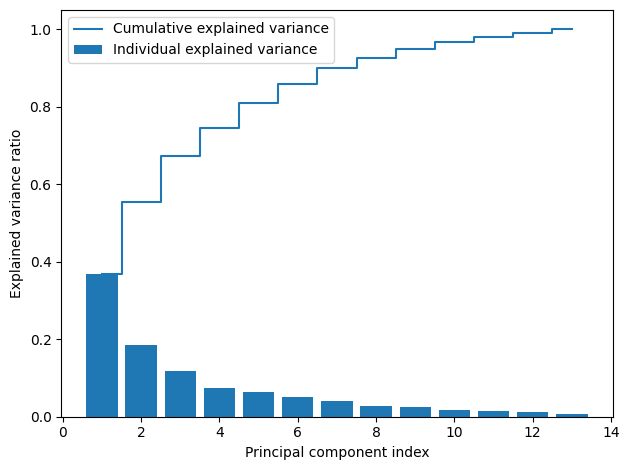

In [12]:
# Total and explained variance
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)


plt.bar(range(1,14), var_exp, align='center',
label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [14]:
# we will sort the eigenpairs by descending order of the eigenvalues,
# construct a projection matrix from the selected eigenvectors, and use the projection matrix to transform 
# the data onto the lower-dimensional subspace
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# 5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (����������).
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w) #  we have created a 13×2-dimensional projection matrix, W, from the top two eigenvectors


Matrix W:
 [[-0.13724218 -0.50303478]
 [ 0.24724326 -0.16487119]
 [-0.02545159 -0.24456476]
 [ 0.20694508  0.11352904]
 [-0.15436582 -0.28974518]
 [-0.39376952 -0.05080104]
 [-0.41735106  0.02287338]
 [ 0.30572896 -0.09048885]
 [-0.30668347 -0.00835233]
 [ 0.07554066 -0.54977581]
 [-0.32613263  0.20716433]
 [-0.36861022  0.24902536]
 [-0.29669651 -0.38022942]]


In [21]:
# Using the projection matrix, we can now transform an example, x (represented as a 13-dimensional 
# row vector), onto the PCA subspace (the principal components one and two) obtaining x′, now a 
# two-dimensional example vector consisting of two new features:
# x′ = xW

# x_train_std[0].dot(w)

# we can transform the entire 124×13-dimensional training dataset onto the two principal 
# components by calculating the matrix dot product:
# X′ = XW

X_train_pca = X_train_std.dot(w) # 6. Construct a projection matrix, W, from the “top” k eigenvectors.

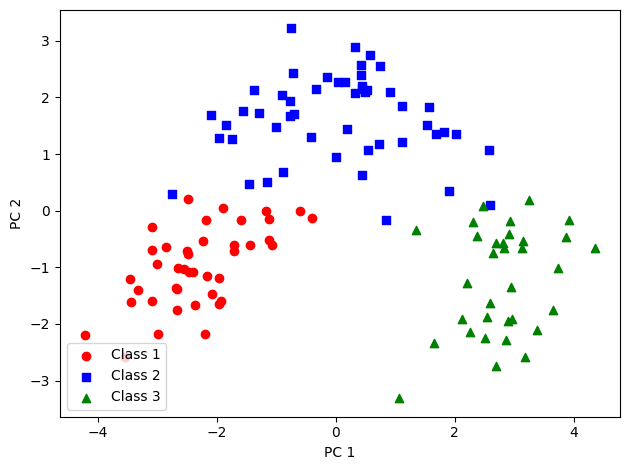

In [22]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
    X_train_pca[y_train==l, 1],
    c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# the data is more spread along the first principal component (x axis) than 
# the second principal component (y axis), which is consistent with the explained variance ratio plot 
# that we created in the previous subsection. However, we can tell that a linear classifier will likely be 
# able to separate the classes well:


/mnt/c9f28c3e-b27b-4e9a-9ba4-cf62e6a3b171/ml-stuff/perceptron/perceptron-scratch/my_virtual_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


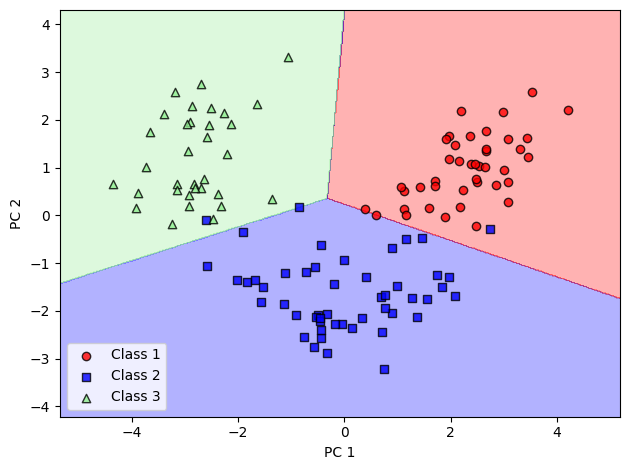

In [34]:
# PCA in scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
random_state=1,
solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

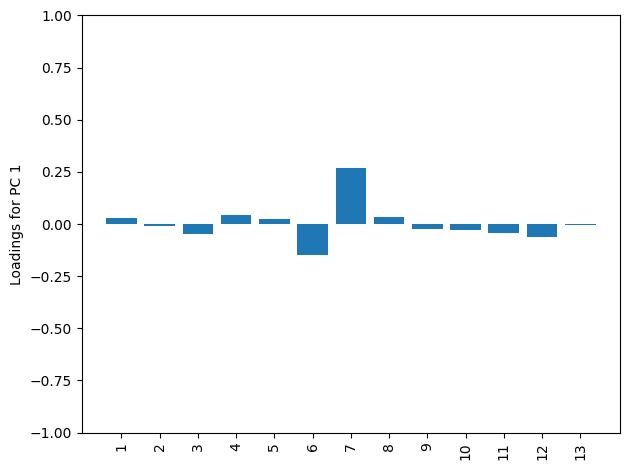

In [35]:
# Sometimes, we are interested to know about how much each original feature contributes to a given principal component. These c


loadings = eigen_vecs * np.sqrt(eigen_vals)



# LDA
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

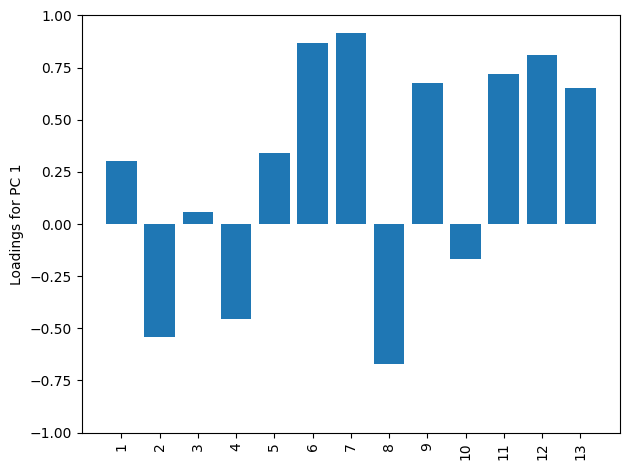

In [36]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [37]:
#Dimensionality Reduction
# PCs allow you to reduce the dimensionality of your data by selecting only the first few PCs that capture most of the variance. For example, if 2 PCs capture 95% of the variance, you can reduce the data to 2 dimensions, discarding the remaining less important dimensions.
# To perform LDA:
# 1. Standardize the d-dimensional dataset (d is the number of features).
# 2. For each class, compute the d-dimensional mean vector.
# 3. Construct the between-class scatter matrix, SB, and the within-class scatter matrix, SW.
# 4. Compute the eigenvectors and corresponding eigenvalues of the matrix, ��������
# −1��������.
# 5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
# 6. Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a d×k-dimensional transformation matrix, W; the eigenvectors are the columns of this matrix.
# 7. Project the examples onto the new feature subspace using the transformation matrix, W.

In [39]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print(f'MV {label}: {mean_vecs[label-1]}')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]


In [44]:
# Using the mean vectors, we can now compute the within-class scatter matrix, SW
# This is calculated by summing up the individual scatter matrices, Si, of each individual class i:

d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
 class_scatter = np.zeros((d, d))
 for row in X_train_std[y_train == label]:
  row, mv = row.reshape(d, 1), mv.reshape(d, 1)
  class_scatter += (row - mv).dot((row - mv).T)
 S_W += class_scatter
print('Within-class scatter matrix: '
 f'{S_W.shape[0]}x{S_W.shape[1]}')

# The assumption that we are making when we are computing the scatter matrices is that the class labels in the training dataset are uniformly distributed. However, if we print the number of class labels, we see that this assumption is violated:
print('Class label distribution:',
 np.bincount(y_train)[1:])

# Thus, we want to scale the individual scatter matrices Si before we sum them up as scatter matrix SW. When we divide the scatter matrices by the number of class samples, we can see that computing the scaled scatter matrices is equivalent to computing the covariance matrix:

d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
 class_scatter = np.cov(X_train_std[y_train == label].T)
 S_W += class_scatter
print('Scaled within-class scatter matrix: '
    f'{S_W.shape[0]}x{S_W.shape[1]}')
# The between-class scatter matrix SB can be computed in a similar way to the within-class scatter matrix, SW. The overall scatter matrix, S, is the sum of the within-class scatter matrix, SW, and the between-class scatter matrix, SB:

mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
 n = X_train_std[y_train == i + 1, :].shape[0]
 mean_vec = mean_vec.reshape(d, 1) # make column vector
 S_B += n * (mean_vec - mean_overall).dot(
 (mean_vec - mean_overall).T)
print('Between-class scatter matrix: '
 f'{S_B.shape[0]}x{S_B.shape[1]}')


Within-class scatter matrix: 13x13
Class label distribution: [41 50 33]
Scaled within-class scatter matrix: 13x13
Between-class scatter matrix: 13x13


In [48]:

# The remaining steps of the LDA are similar to the steps of the PCA. We will compute the eigenvalues and eigenvectors of the matrix S−1B SW and sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
# The eigenvectors with the largest eigenvalues carry the most information about the distribution of the data. If we are interested in projecting the data onto a subspace that is constructed from more than two eigenvectors, 
# we need to collect these eigenvectors to form a matrix, W:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Make a list of (eigenvalue, eigenvector) tuples and sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

#In LDA, the number of linear discriminants is at most c – 1, where c is the number of class labels, since 
# the in-between scatter matrix, SB, is the sum of c matrices with rank one or less. We can indeed see 
# that we only have two nonzero eigenvalues (the eigenvalues 3-13 are not exactly zero, but this is due 
# to the floating-point arithmetic in NumPy.)


Eigenvalues in decreasing order:

349.61780890599397
172.7615221897938
3.277875948160424e-14
2.842170943040401e-14
2.6347620763320822e-14
2.6347620763320822e-14
1.7169492680170306e-14
1.7169492680170306e-14
1.674335053365992e-14
1.2740060380615543e-14
7.458378098449665e-15
4.737048557054326e-15
3.688843187314971e-15


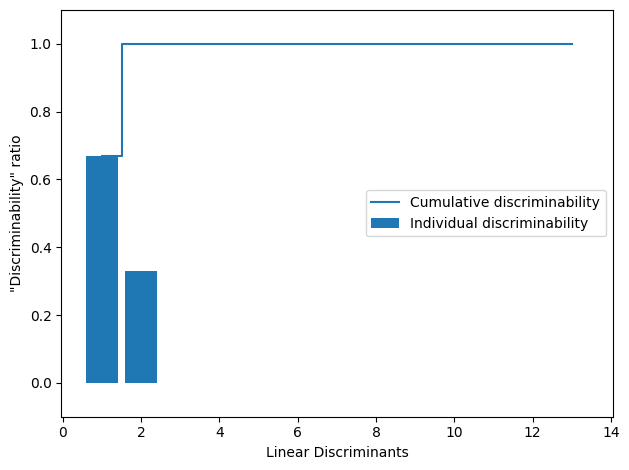

In [49]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real,
    reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, align='center',
    label='Individual discriminability')

plt.step(range(1, 14), cum_discr, where='mid',label='Cumulative discriminability')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [50]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
    eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


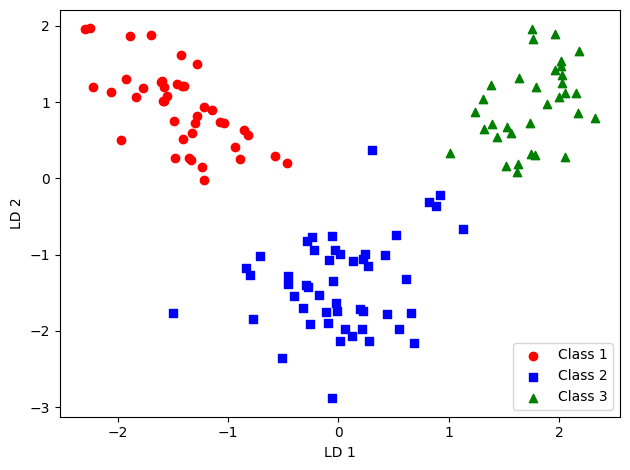

In [51]:
# Projecting examples onto the new feature space
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
    X_train_lda[y_train == l, 1] * (-1),
    c=c, label=f'Class {l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


/mnt/c9f28c3e-b27b-4e9a-9ba4-cf62e6a3b171/ml-stuff/perceptron/perceptron-scratch/my_virtual_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


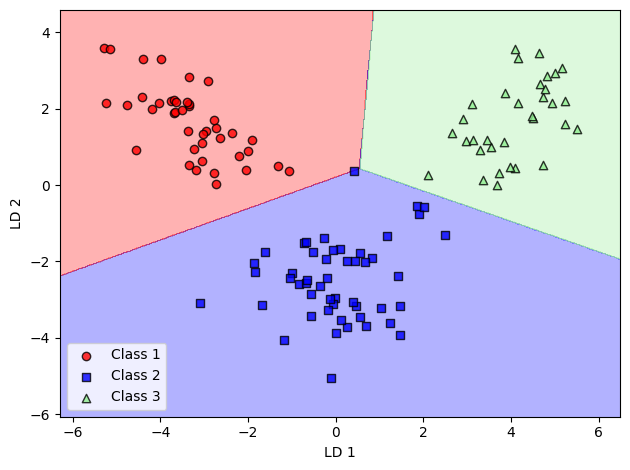

In [54]:
# LDA using scikit-learn

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(multi_class='ovr', random_state=1,solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

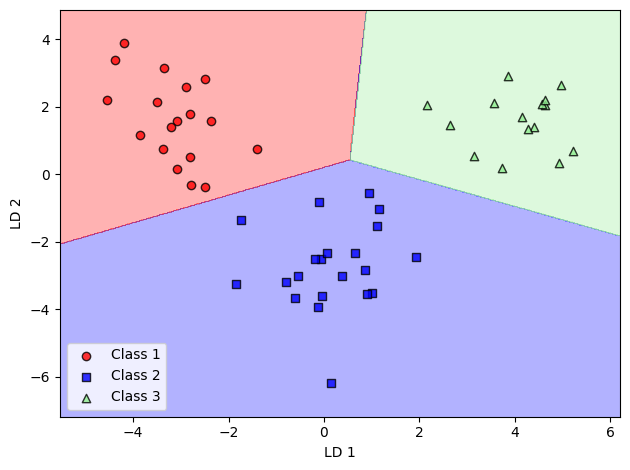

In [55]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

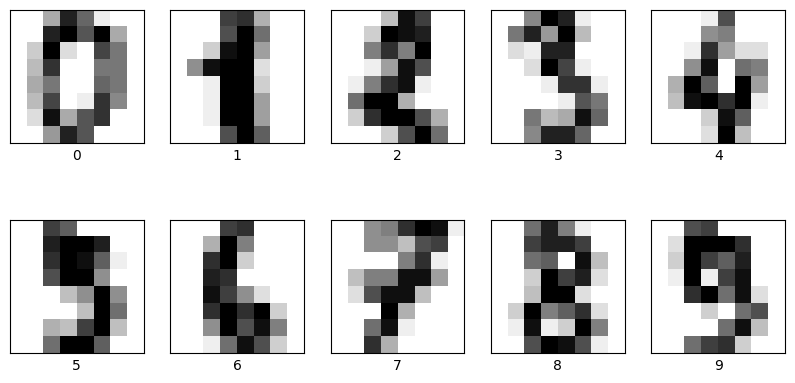

In [56]:
# T-SNE algorithm: t-distributed stochastic neighbor embedding. 
# It is a nonlinear dimensionality reduction technique that is particularly well-suited for embedding high-dimensional data into two or three dimensions, which can then be visualized in a scatter plot.
# t-SNE is a powerful technique that can be used for visualizing high-dimensional data for exploratory data analysis (EDA), can be used for feature engineering, and can be used for preparing the data for supervised learning algorithms.
# t-SNE is a computationally expensive technique, and it is highly recommended to use another dimensionality reduction technique (e.g., PCA) to reduce the number of dimensions in the dataset before applying t-SNE if the number of features is very high.
# t-SNE is a stochastic algorithm, meaning that it will produce different results if you run it multiple times on the same dataset. However, the results are likely to be similar if the algorithm is run with the same hyperparameters.
# t-SNE is a probabilistic technique, meaning that it does not preserve the distances between points in the original space. Instead, it tries to preserve the probability distributions of the points in the original space and the low-dimensional space.
# t-SNE is a nonlinear technique, meaning that it can capture complex patterns in the data that linear techniques (e.g., PCA) cannot capture.
from sklearn.datasets import load_digits
digits=load_digits()
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
 axi.imshow(digits.images[i], cmap='binary')
 axi.set(xticks=[], yticks=[],
 xlabel=digits.target[i])

In [57]:
y_digits=digits.target
X_digits=digits.data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_digits)


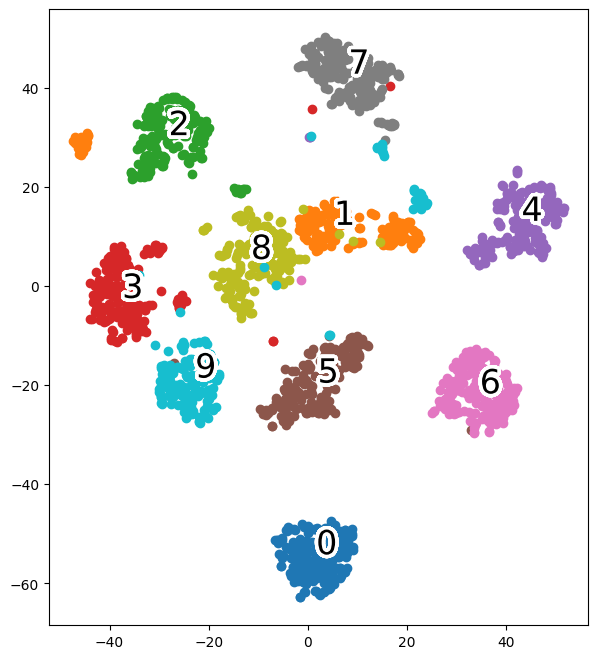

In [62]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
        x[colors == i, 1])
        for i in range(10):
            xtext, ytext = np.median(x[colors == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
plot_projection(X_tsne, y_digits)
plt.show()
